In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torchvision.transforms import ToTensor, ToPILImage, Resize
from torch import optim
from torch.utils.data import DataLoader
from torchvision import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from PIL import Image
from collections import defaultdict
import random
from siamese import siamese_conv, Contrastive_loss

In [2]:
HEIGHT, WIDTH = 100, 160

# Resizing the images
transform = transforms.Compose([
    ToTensor(),
    Resize((HEIGHT, WIDTH))])

# Data paths
ORIGINAL_DATA_PATH = '../data/signatures/full_org/'
FORGED_DATA_PATH = '../data/signatures/full_forg/'

original = defaultdict(list)
forged = defaultdict(list)

class_idx = 0
counter = 0

for f1, f2 in zip(sorted(os.listdir(ORIGINAL_DATA_PATH)), sorted(os.listdir(FORGED_DATA_PATH))):
    img = Image.open(ORIGINAL_DATA_PATH+f1)
    original[class_idx].append(1-transform(img)[0].unsqueeze(0))
    img = Image.open(FORGED_DATA_PATH+f2)
    forged[class_idx].append(1-transform(img)[0].unsqueeze(0))
    counter = (counter+1)%24
    class_idx += 1 if not counter else 0


In [3]:
class dataloader:
    def __init__(self, original, forged, num):
        self.original = original
        self.forged = forged
        self.num = num
    
    def __getitem__(self, idx):
        # for _ in range(self.num):
        idx = random.randint(0, 11)
        img1 = random.choice(original[idx])
        if random.random() < 0.5:
            img2 = random.choice(original[idx])
            target = 0
        else:
            img2 = random.choice(forged[idx])
            if random.random() < 0.25:
                if random.random() < 0.25:
                    img2 = random.choice(forged[random.randint(0, 11)])
                else:
                    new_idx = random.randint(0, 11)
                    while new_idx == idx:
                        new_idx = random.randint(0, 11)
                    img2 = random.choice(original[new_idx])
            target = 1
        return (img1, img2, target)
    
    def __len__(self):
        return self.num

data = dataloader(original, forged, 640)

In [4]:
train = DataLoader(data, 64, shuffle=True)

In [5]:
model = siamese_conv(HEIGHT, WIDTH)
EPOCHS = 100
optimizer = optim.Adam(model.parameters())

In [6]:
for i in tqdm(range(EPOCHS)):
    running_loss = 0
    for s1, s2, target in train:
        out1 = model.forward(s1)
        out2 = model.forward(s2)
        loss = Contrastive_loss(target, 1, 1, out1, out2)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()*64
    running_loss /= data.__len__()
    print(f'loss: {running_loss}')

  1%|          | 1/100 [00:07<12:06,  7.34s/it]

loss: 33.532054328918456


  2%|▏         | 2/100 [00:14<11:54,  7.29s/it]

loss: 10.171788644790649


  3%|▎         | 3/100 [00:21<11:36,  7.18s/it]

loss: 6.6165917158126835


  4%|▍         | 4/100 [00:28<11:29,  7.18s/it]

loss: 4.211918830871582


  5%|▌         | 5/100 [00:35<11:20,  7.16s/it]

loss: 3.499807834625244


  6%|▌         | 6/100 [00:43<11:18,  7.22s/it]

loss: 3.8283318519592284


  7%|▋         | 7/100 [00:50<11:14,  7.26s/it]

loss: 3.310037064552307


  8%|▊         | 8/100 [00:58<11:13,  7.32s/it]

loss: 2.806560719013214


  9%|▉         | 9/100 [01:05<11:04,  7.30s/it]

loss: 2.030153453350067


 10%|█         | 10/100 [01:13<11:08,  7.42s/it]

loss: 1.9783751606941222


 11%|█         | 11/100 [01:20<11:01,  7.43s/it]

loss: 1.4481539607048035


 12%|█▏        | 12/100 [01:27<10:40,  7.28s/it]

loss: 1.606857067346573


 13%|█▎        | 13/100 [01:34<10:27,  7.21s/it]

loss: 1.4096739172935486


 14%|█▍        | 14/100 [01:41<10:25,  7.27s/it]

loss: 1.326228541135788


 15%|█▌        | 15/100 [01:49<10:24,  7.35s/it]

loss: 1.2775627732276917


 16%|█▌        | 16/100 [01:57<10:26,  7.45s/it]

loss: 0.8940803527832031


 17%|█▋        | 17/100 [02:05<10:30,  7.59s/it]

loss: 0.9615702450275421


 18%|█▊        | 18/100 [02:12<10:19,  7.55s/it]

loss: 0.7450007617473602


 19%|█▉        | 19/100 [02:20<10:13,  7.57s/it]

loss: 0.6987898141145706


 20%|██        | 20/100 [02:27<10:09,  7.62s/it]

loss: 0.684820955991745


 21%|██        | 21/100 [02:35<10:02,  7.63s/it]

loss: 0.7438070774078369


 22%|██▏       | 22/100 [02:43<09:56,  7.64s/it]

loss: 0.7564487904310226


 23%|██▎       | 23/100 [02:51<09:59,  7.78s/it]

loss: 0.6808094143867492


 24%|██▍       | 24/100 [02:59<09:53,  7.80s/it]

loss: 0.4884166419506073


 25%|██▌       | 25/100 [03:06<09:46,  7.82s/it]

loss: 0.523535218834877


 26%|██▌       | 26/100 [03:14<09:35,  7.77s/it]

loss: 0.7965880125761032


 27%|██▋       | 27/100 [03:21<09:14,  7.60s/it]

loss: 0.5491643935441971


 28%|██▊       | 28/100 [03:29<09:04,  7.56s/it]

loss: 0.4135870158672333


 29%|██▉       | 29/100 [03:36<08:58,  7.59s/it]

loss: 0.3801146477460861


 30%|███       | 30/100 [03:44<08:58,  7.70s/it]

loss: 0.3737324640154839


 31%|███       | 31/100 [03:52<08:51,  7.70s/it]

loss: 0.38430281579494474


 32%|███▏      | 32/100 [04:00<08:42,  7.69s/it]

loss: 0.3727889537811279


 33%|███▎      | 33/100 [04:07<08:32,  7.65s/it]

loss: 0.3219826206564903


 34%|███▍      | 34/100 [04:15<08:22,  7.61s/it]

loss: 0.2957755967974663


 35%|███▌      | 35/100 [04:22<08:14,  7.60s/it]

loss: 0.32694063782691957


 36%|███▌      | 36/100 [04:30<08:12,  7.70s/it]

loss: 0.2415848568081856


 37%|███▋      | 37/100 [04:38<08:01,  7.65s/it]

loss: 0.2572634071111679


 38%|███▊      | 38/100 [04:45<07:49,  7.58s/it]

loss: 0.21823731064796448


 39%|███▉      | 39/100 [04:53<07:41,  7.56s/it]

loss: 0.22468025535345076


 40%|████      | 40/100 [05:01<07:38,  7.64s/it]

loss: 0.18907688930630684


 41%|████      | 41/100 [05:08<07:28,  7.60s/it]

loss: 0.19163928553462029


 42%|████▏     | 42/100 [05:16<07:23,  7.64s/it]

loss: 0.16883374005556107


 43%|████▎     | 43/100 [05:24<07:16,  7.66s/it]

loss: 0.13689705207943917


 44%|████▍     | 44/100 [05:32<07:20,  7.86s/it]

loss: 0.18260325416922568


 45%|████▌     | 45/100 [05:40<07:08,  7.79s/it]

loss: 0.13139167726039885


 46%|████▌     | 46/100 [05:47<06:57,  7.73s/it]

loss: 0.1473061352968216


 47%|████▋     | 47/100 [05:55<06:49,  7.72s/it]

loss: 0.14894177615642548


 48%|████▊     | 48/100 [06:03<06:46,  7.81s/it]

loss: 0.1545487478375435


 49%|████▉     | 49/100 [06:10<06:26,  7.57s/it]

loss: 0.1342045396566391


 50%|█████     | 50/100 [06:17<06:05,  7.30s/it]

loss: 0.14680312871932982


 51%|█████     | 51/100 [06:23<05:48,  7.11s/it]

loss: 0.15254175364971162


 52%|█████▏    | 52/100 [06:30<05:40,  7.09s/it]

loss: 0.12578492909669875


 53%|█████▎    | 53/100 [06:37<05:32,  7.07s/it]

loss: 0.12992194369435311


 54%|█████▍    | 54/100 [06:44<05:21,  6.99s/it]

loss: 0.14514087587594987


 55%|█████▌    | 55/100 [06:51<05:11,  6.92s/it]

loss: 0.16542203202843667


 56%|█████▌    | 56/100 [06:58<05:09,  7.03s/it]

loss: 0.14452151358127593


 57%|█████▋    | 57/100 [07:06<05:09,  7.19s/it]

loss: 0.13323796540498734


 58%|█████▊    | 58/100 [07:13<05:02,  7.20s/it]

loss: 0.13739126473665236


 59%|█████▉    | 59/100 [07:20<04:59,  7.31s/it]

loss: 0.18820085376501083


 60%|██████    | 60/100 [07:27<04:46,  7.15s/it]

loss: 0.1524889163672924


 61%|██████    | 61/100 [07:34<04:37,  7.12s/it]

loss: 0.1991521932184696


 62%|██████▏   | 62/100 [07:42<04:31,  7.16s/it]

loss: 0.21120477616786956


 63%|██████▎   | 63/100 [07:49<04:26,  7.21s/it]

loss: 0.16190848872065544


 64%|██████▍   | 64/100 [07:56<04:16,  7.13s/it]

loss: 0.16605857089161874


 65%|██████▌   | 65/100 [08:03<04:10,  7.14s/it]

loss: 0.1666015662252903


 66%|██████▌   | 66/100 [08:10<03:58,  7.02s/it]

loss: 0.13196576461195947


 67%|██████▋   | 67/100 [08:16<03:49,  6.94s/it]

loss: 0.13570574149489403


 68%|██████▊   | 68/100 [08:23<03:40,  6.89s/it]

loss: 0.1658258892595768


 69%|██████▉   | 69/100 [08:30<03:32,  6.86s/it]

loss: 0.15004296377301216


 70%|███████   | 70/100 [08:37<03:24,  6.80s/it]

loss: 0.1400044947862625


 71%|███████   | 71/100 [08:44<03:18,  6.86s/it]

loss: 0.168019387871027


 72%|███████▏  | 72/100 [08:51<03:14,  6.94s/it]

loss: 0.13753967881202697


 73%|███████▎  | 73/100 [08:58<03:07,  6.93s/it]

loss: 0.11884225457906723


 74%|███████▍  | 74/100 [09:05<03:01,  6.97s/it]

loss: 0.13263002559542655


 75%|███████▌  | 75/100 [09:12<02:55,  7.00s/it]

loss: 0.1220951221883297


 76%|███████▌  | 76/100 [09:19<02:48,  7.02s/it]

loss: 0.12965801320970058


 77%|███████▋  | 77/100 [09:26<02:41,  7.00s/it]

loss: 0.11099449321627616


 78%|███████▊  | 78/100 [09:33<02:32,  6.92s/it]

loss: 0.09104541167616845


 79%|███████▉  | 79/100 [09:40<02:25,  6.94s/it]

loss: 0.087014289945364


 80%|████████  | 80/100 [09:46<02:18,  6.92s/it]

loss: 0.08362058699131011


 81%|████████  | 81/100 [09:54<02:13,  7.02s/it]

loss: 0.08017157167196273


 82%|████████▏ | 82/100 [10:01<02:06,  7.02s/it]

loss: 0.08770576789975167


 83%|████████▎ | 83/100 [10:08<01:58,  6.98s/it]

loss: 0.09210583493113518


 84%|████████▍ | 84/100 [10:15<01:52,  7.05s/it]

loss: 0.09969114176928998


 85%|████████▌ | 85/100 [10:22<01:45,  7.02s/it]

loss: 0.08785337209701538


 86%|████████▌ | 86/100 [10:29<01:39,  7.12s/it]

loss: 0.10914906300604343


 87%|████████▋ | 87/100 [10:36<01:32,  7.11s/it]

loss: 0.10183174014091492


 88%|████████▊ | 88/100 [10:44<01:27,  7.25s/it]

loss: 0.10793519094586372


 89%|████████▉ | 89/100 [10:51<01:20,  7.31s/it]

loss: 0.1421033561229706


 90%|█████████ | 90/100 [10:59<01:14,  7.42s/it]

loss: 0.13496166914701463


 91%|█████████ | 91/100 [11:07<01:07,  7.50s/it]

loss: 0.15764367654919625


 92%|█████████▏| 92/100 [11:14<00:58,  7.37s/it]

loss: 0.12539360150694848


 93%|█████████▎| 93/100 [11:21<00:51,  7.41s/it]

loss: 0.14626625850796698


 94%|█████████▍| 94/100 [11:29<00:44,  7.47s/it]

loss: 0.12835917621850967


 95%|█████████▌| 95/100 [11:36<00:37,  7.43s/it]

loss: 0.11909886226058006


 96%|█████████▌| 96/100 [11:43<00:29,  7.37s/it]

loss: 0.10060288608074189


 97%|█████████▋| 97/100 [11:51<00:22,  7.45s/it]

loss: 0.09739204421639443


 98%|█████████▊| 98/100 [11:59<00:15,  7.57s/it]

loss: 0.10004681125283241


 99%|█████████▉| 99/100 [12:06<00:07,  7.51s/it]

loss: 0.09917134791612625


100%|██████████| 100/100 [12:14<00:00,  7.34s/it]

loss: 0.10578198730945587


In [7]:
with torch.no_grad():
    img1 = original[3][4].unsqueeze(0)
    img2 = original[3][1].unsqueeze(0)
    img3 = original[4][0].unsqueeze(0)
    img4 = forged[3][14].unsqueeze(0)

    out1 = model.forward(img1)
    out2 = model.forward(img2)
    out3 = model.forward(img3)
    out4 = model.forward(img4)

    print(torch.pairwise_distance(out1, out2, 2))
    print(torch.pairwise_distance(out1, out3, 2))
    print(torch.pairwise_distance(out1, out4, 2))

tensor([0.1780])
tensor([12.5088])
tensor([13.8891])


For reference here are the images of signatures being tested above

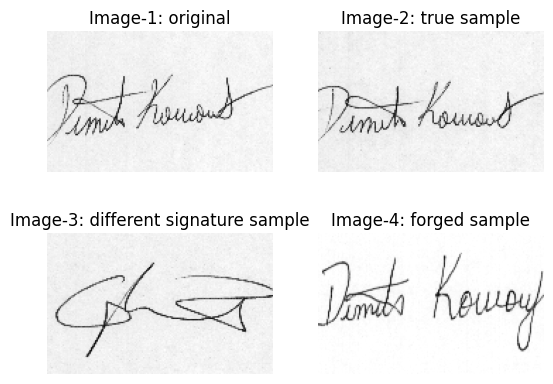

In [17]:
fig, ax = plt.subplots(2,2)

ax[0][0].imshow(1-img1.squeeze(0).squeeze(0), cmap='gray')
ax[0][0].set_title('Image-1: original')
ax[0][0].axis('off')

ax[0][1].imshow(1-img2.squeeze(0).squeeze(0), cmap='gray')
ax[0][1].set_title('Image-2: true sample')
ax[0][1].axis('off')

ax[1][0].imshow(1-img3.squeeze(0).squeeze(0), cmap='gray')
ax[1][0].set_title('Image-3: different signature sample')
ax[1][0].axis('off')

ax[1][1].imshow(1-img4.squeeze(0).squeeze(0), cmap='gray')
ax[1][1].set_title('Image-4: forged sample')
ax[1][1].axis('off')

plt.show()

In [9]:
torch.save(model, "../Saved Models/siamese.pth")

In [10]:
def check(original, sample):
    original = 1-transform(original)[0].unsqueeze(0).unsqueeze(0)
    sample = 1-transform(sample)[0].unsqueeze(0).unsqueeze(0)
    with torch.no_grad():
        out1 = model.forward(original)
        out2 = model.forward(sample)
        distance = torch.pairwise_distance(out1, out2, 2)
        return "fake" if distance > 1 else "genuine"

In [11]:
# I tested on my mother's signature. For privacy reasons, the signature hasn't been included in the repository

org = Image.open('../data/signatures/original.jpg')
fake = Image.open('../data/signatures/forged.jpg')

check(org, fake)

'fake'